# Lektion 12

In [1]:
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Matrixexponentiale

In [2]:
x = Symbol('x', real=True)

In [3]:
A = Matrix(3,3, [x,x,0,0,x,x,0,0,x])
A

⎡x  x  0⎤
⎢       ⎥
⎢0  x  x⎥
⎢       ⎥
⎣0  0  x⎦

In [4]:
A.exp()

⎡           2  x⎤
⎢ x     x  x ⋅ℯ ⎥
⎢ℯ   x⋅ℯ   ─────⎥
⎢            2  ⎥
⎢               ⎥
⎢      x      x ⎥
⎢0    ℯ    x⋅ℯ  ⎥
⎢               ⎥
⎢            x  ⎥
⎣0    0     ℯ   ⎦

## Koeffizienten

In [5]:
x = Symbol('x')
p = series(exp(x+2*x**2)**2, x, 0, 10)
p

In [9]:
p.coeff(x, 0)

In [10]:
a = ((1-exp(x)+exp(2*x))**5).expand()
a

In [11]:
a.coeff(exp(6*x))

In [12]:
b = (1+x**2)**3
b

In [13]:
b.coeff(x**2)

In [14]:
b.expand().coeff(x**2)

Böse Falle!

## Gekoppelte Pendel

\begin{align}
y'' &= w - y + \cos(2t)\\
w'' &= y - 3w
\end{align}

Übersetzt sich in
\begin{align*}
 y_0' &= y_1 \\
 y_1' &= y_2 - y_0 + \cos(2t) \\
 y_2' &= y_3 \\
 y_3' &= y_0 - 3 y_2
\end{align*}

In [15]:
y = Function('y')
w = Function('w')
t = Symbol('t', real=True)

In [16]:
dgl = {}
dgl[0] = Eq(y(t).diff(t,2), w(t) - y(t) + cos(2*t))
dgl[1] = Eq(w(t).diff(t,2), y(t) - 3*w(t))

In [17]:
A = Matrix(4,4,[0,1,0,0,-1,0,1,0,0,0,0,1,1,0,-3, 0])
A

⎡0   1  0   0⎤
⎢            ⎥
⎢-1  0  1   0⎥
⎢            ⎥
⎢0   0  0   1⎥
⎢            ⎥
⎣1   0  -3  0⎦

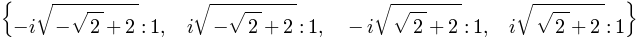

In [18]:
A.eigenvals()

Fundamentalsystem

In [19]:
%time Phi = (x*A).exp()  # Fundamentalsystem für das System

CPU times: user 2.22 s, sys: 0 ns, total: 2.22 s
Wall time: 2.22 s


Das Fundamentalsystem wird leider zu kompliziert


In [20]:
% time len(latex(Phi))

CPU times: user 30.3 s, sys: 8 ms, total: 30.3 s
Wall time: 30.3 s


In [21]:
a = [Symbol('a_'+str(j), real=True) for j in range(2)]
b = [Symbol('b_'+str(j), real=True) for j in range(2)]

Ansatz für eine spezielle Lösung des inhomogenen Systems

In [22]:
phi = a[0]*cos(2*t) + a[1]*sin(2*t)
psi = b[0]*cos(2*t) + b[1]*sin(2*t)

In [23]:
ers = {}
ers[y(t)] = phi
ers[w(t)] = psi

In [26]:
glg = [dgl[j].subs(ers).doit() for j in range(2)]
glg

In [27]:
gls = []
for gl in glg:
    diff = (gl.rhs - gl.lhs).expand()
    gls.append(diff.coeff(cos(2*t)))
    gls.append(diff.coeff(sin(2*t)))

gls

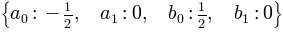

In [28]:
Lsg = solve(gls)
Lsg

Probe:

In [29]:
yp = phi.subs(Lsg)
yp

In [30]:
wp = psi.subs(Lsg)
wp

In [31]:
ers_probe = {}
ers_probe[y(t)] = yp
ers_probe[w(t)] = wp

In [32]:
[dgl[j].subs(ers_probe).doit() for j in range(2)]

## Numerische Lösungen

In [33]:
x = Symbol('x')
y = Function('y')

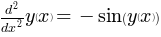

In [34]:
dgl = Eq(y(x).diff(x,2), -sin(y(x)))
dgl

In [36]:
#dsolve(dgl)  # NotImplementedError

die Funktion `mpmath.odefun` löst die Differentialgleichung $[y_0', \dots, y_n'] = F(x, [y_0, \dots, y_n])$.

In [37]:
def F(x, y):
    y0, y1 = y
    w0 = y1
    w1 = -mpmath.sin(y0)
    return [w0, w1]

In [38]:
F(0,[0,1])

[1, mpf('0.0')]

In [39]:
ab = [mpmath.pi/2, 0]
x0 = 0

In [40]:
phi = mpmath.odefun(F, x0, ab)
phi(1)

[mpf('1.0749116843722417'), mpf('-0.97551004396953367')]

In [41]:
xn = np.linspace(0, 25, 200)
wn = [phi(xx)[0] for xx in xn]
dwn = [phi(xx)[1] for xx in xn]

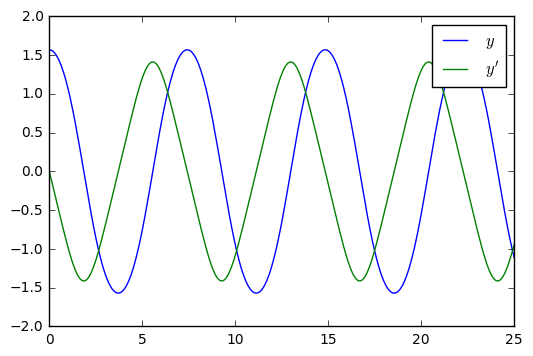

In [42]:
plt.plot(xn, wn, label="$y$")
plt.plot(xn, dwn, label="$y'$")
plt.legend();

Ergebnisse werden intern gespeichert (Cache)

In [43]:
%time phi(50)

CPU times: user 1.98 s, sys: 0 ns, total: 1.98 s
Wall time: 1.98 s


[mpf('-0.084824921581113169'), mpf('1.4116688868027041')]

In [44]:
%time phi(60)

CPU times: user 772 ms, sys: 0 ns, total: 772 ms
Wall time: 770 ms


[mpf('1.3469819877501543'), mpf('-0.6662588540047103')]

In [45]:
%time phi(40)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 428 µs


[mpf('-1.2600336115087054'), mpf('-0.78202929230655394')]

## Die Pendelgleichung

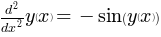

In [46]:
dgl

In [47]:
eta = Symbol('eta')
y0 = Symbol('y0')

Wir lösen die AWA $y'' = -\sin(y)$, $y(0) = y_0$, $y'(0) = 0$.

In [48]:
H = Integral(-sin(eta), eta).doit()
H

In [52]:
E = y(x).diff(x)**2/2 - H.subs(eta, y(x))  # Energie
E   

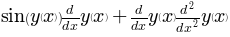

In [53]:
E.diff(x)

In [54]:
E.diff(x).subs(dgl.lhs, dgl.rhs)

Die Energie ist eine Erhaltungsgröße.

In [55]:
E0 = E.subs({y(x): y0, y(x).diff(x): 0})
E0

In [56]:
dgl_E = Eq(E, E0)
dgl_E

In [ ]:
# dsolve(dgl_E)  # abgebrochen

Lösen wir mit der Methode der Trennung der Variablen.

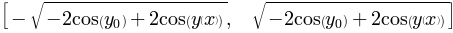

In [57]:
Lsg = solve(dgl_E, y(x).diff(x))
Lsg

In [59]:
print(dgl_E)

Eq(-cos(y(x)) + Derivative(y(x), x)**2/2, -cos(y0))


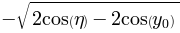

In [60]:
h = Lsg[0].subs(y(x), eta)
h

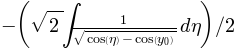

In [62]:
I1 = Integral(1/h, eta).doit()
I1

In der Tat nicht elementar integrierbar.

Trennung der Variablem führt zu
$$ -\frac{\sqrt2}2 \int_{y_0}^{y(x)} \frac{d\eta}{\sqrt{\cos(\eta)-\cos(y_0)}} = x. $$
Insbesondere ist 
$$ -\frac{\sqrt2}2 \int_{y_0}^{-y_0} \frac{d\eta}{\sqrt{\cos(\eta)-\cos(y_0)}}  $$
gleich der halben Schwingungsperiode.

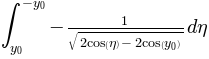

In [63]:
I2 = Integral(1/h, (eta, y0, -y0))
I2

In [64]:
def T(ypsilon0):
    return 2*re(I2.subs(y0, ypsilon0).n())

In [65]:
T(pi/2)

In [66]:
phi(T(pi/2)), mpmath.pi/2

([mpf('1.5707963267948966'), mpf('6.5086722915372182e-17')],
 mpf('1.5707963267948966'))

In [67]:
xn = np.linspace(0.1, .95*np.pi, 5)
wn = [T(yy) for yy in xn]

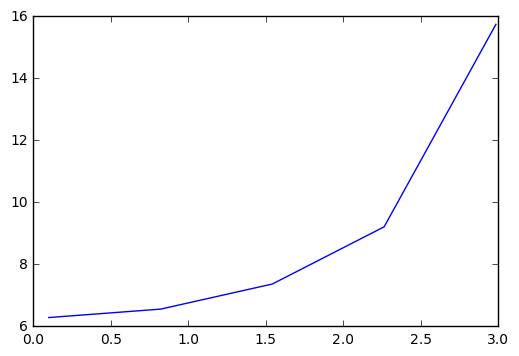

In [68]:
plt.plot(xn, wn);